In [34]:
# The model trainnig regression problem statement 
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,roc_auc_score
import numpy as np
import pandas as pd 


In [35]:
dataset=pd.read_csv('Data\stud.csv')
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
# independent and the dependent features 

X=dataset.drop('math_score',axis=1)
Y=dataset['math_score']

# X.head(),Y.head()

In [37]:
# we will list the categroical and the numericla features

cat_features=[ i for i in X.columns if dataset[i].dtype=='O']
num_features=[ i for i in X.columns if dataset[i].dtype!='O']

num_features,cat_features

(['reading_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

In [38]:
# encoding of the catgerical features

l_encoder=LabelEncoder()

X['parental_level_of_education']=l_encoder.fit_transform(dataset['parental_level_of_education'])
X['race_ethnicity']=l_encoder.fit_transform(dataset['race_ethnicity'])

X


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,1,1,standard,none,72,74
1,female,2,4,standard,completed,90,88
2,female,1,3,standard,none,95,93
3,male,0,0,free/reduced,none,57,44
4,male,2,4,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,4,3,standard,completed,99,95
996,male,2,2,free/reduced,none,55,55
997,female,2,2,free/reduced,completed,71,65
998,female,3,4,standard,completed,78,77


In [39]:
#test train split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.20)
x_train.shape,x_test.shape



((800, 7), (200, 7))

In [40]:
cat_features,num_features

(['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'],
 ['reading_score', 'writing_score'])

In [41]:
# cat_features.remove('race_ethnicity')
cat_features.remove('parental_level_of_education')


traformer=ColumnTransformer([
    ("onehot",OneHotEncoder(),cat_features),
    ('StandardScaler',StandardScaler(),num_features)
])



In [42]:
x_train=traformer.fit_transform(x_train)
x_test=traformer.transform(x_test)


In [43]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.030791,0.434053
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.930290,0.964701
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.345443,1.163694
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.176786,-0.162925
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.384363,-0.759904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.106557,2.092328
796,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.453555,-0.494580
797,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.522747,-1.025228
798,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.491438,-1.025228


In [44]:
# train my model
model={
    "Linear_Regression":LinearRegression(),
    "XGB_Regressor":XGBRegressor(),
    "Elastic_net":ElasticNet(),
    "lasso":Lasso(),
    "Ridge":Ridge(),
    "AdaBoost_Regressor":AdaBoostRegressor(),
    "Decision_Tree":DecisionTreeRegressor(),
    "S_V_M":SVR(),
    'KNeighbors_Regressor':KNeighborsRegressor(),
    "Random_Forest":RandomForestRegressor()}

In [45]:
for i in range(len(list(model))):
    m1=list(model.values())[i]
    print(m1)

LinearRegression()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
ElasticNet()
Lasso()
Ridge()
AdaBoostRegressor()
DecisionTreeRegressor()
SVR()
KNeighborsRegressor()
RandomForestRegressor()


In [46]:


for i in range(len(list(model))):
    m1=list(model.values())[i]
    
    m1.fit(x_train,y_train)

    y_pred_train=m1.predict(x_train)

    print("Perfomace evalution of the models")
    print(list(model.keys())[i])
    
    print(f"r2_score:{r2_score(y_train,y_pred_train)}")
    print(f"Mean absolute error :{mean_absolute_error(y_train,y_pred_train)}")
    print(f"maena squared_error :{mean_squared_error(y_train,y_pred_train)}")
    # print(f"auc_roc score:{roc_auc_score(y_train,y_pred_train,average='weighted')}")

    print("------------------------------------------------------------------------------")

    print("Test performance evalution")

    y_pred=m1.predict(x_test)

    print("Perfomace evalution of the models")
    print(list(model.keys())[i])
    
    print(f"r2_score:{r2_score(y_test,y_pred)}")
    print(f"Mean absolute error :{mean_absolute_error(y_test,y_pred)}")
    print(f"maena squared_error :{mean_squared_error(y_test,y_pred)}")
    # print(f"auc_roc score:{roc_auc_score(x_test,y_pred,average='weighted')}")


    print('-----------------------------------------------------------------------------')

    


Perfomace evalution of the models
Linear_Regression
r2_score:0.8721140165967166
Mean absolute error :4.307550899830134
maena squared_error :28.831573444915094
------------------------------------------------------------------------------
Test performance evalution
Perfomace evalution of the models
Linear_Regression
r2_score:0.8805299335052258
Mean absolute error :4.197643198360688
maena squared_error :29.071654828731972
-----------------------------------------------------------------------------
Perfomace evalution of the models
XGB_Regressor
r2_score:0.9905098676681519
Mean absolute error :1.0142627954483032
maena squared_error :2.1395227909088135
------------------------------------------------------------------------------
Test performance evalution
Perfomace evalution of the models
XGB_Regressor
r2_score:0.8228289484977722
Mean absolute error :5.136038303375244
maena squared_error :43.112518310546875
-----------------------------------------------------------------------------
Per

In [48]:
# hyper paramet tuning for the best model out of all model

# params={


    
# }

# best_modle=GridSearchCV(estimator="best_model",cv=5,verbose=3,n_jobs=-1,scoring='mean_absolute_error',param_grid=params)


# m1=best_modle.fit(x_train)
# print("Best parameters:" ,m1.best_params_)

# print('--------------------------------------------------------------------------------------')

# print("Test performance evalution")

# # m1=model(parameters)
# y_pred=m1.predict(x_test)

# print("Perfomace evalution of best modle with the best suitable hyperparameters")

        
# print(f"r2_score:{r2_score(x_train,y_pred)}")
# print(f"Mean absolute error :{mean_absolute_error(x_test,y_pred)}")
# print(f"maena squared_error :{mean_squared_error(x_test,y_pred)}")
# print(f"auc_roc score:{roc_auc_score(x_test,y_pred,average='weighted')}")



<Axes: xlabel='math_score'>

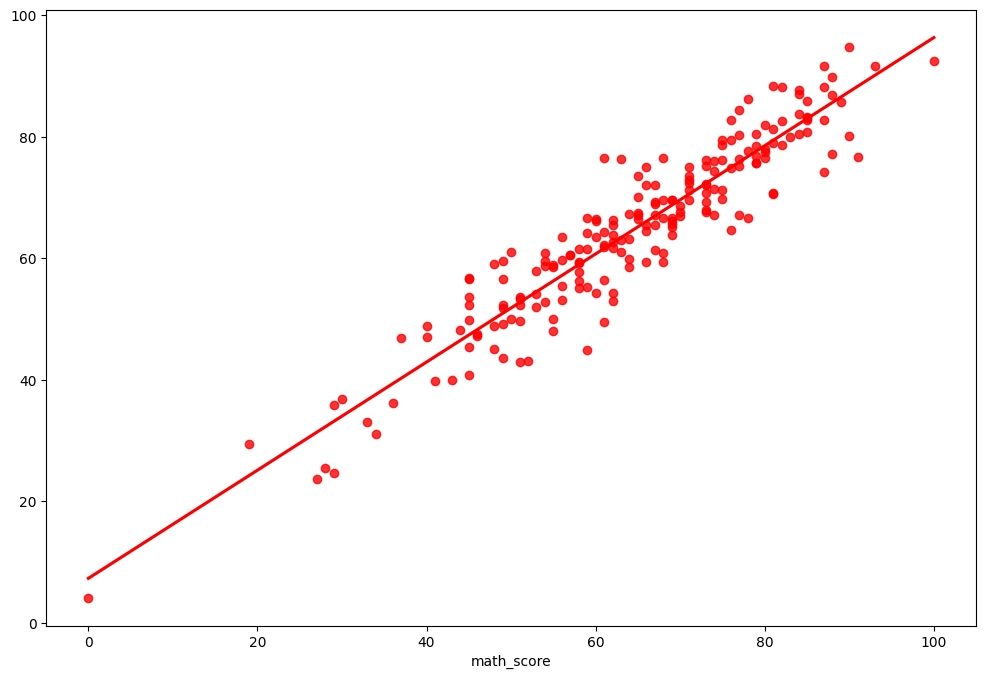

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns 
m1=Ridge()
m1.fit(x_train,y_train)
y_pred=m1.predict(x_test)


plt.figure(figsize=(12,8))

sns.regplot(x=y_test,y=y_pred,ci=None,color='r')






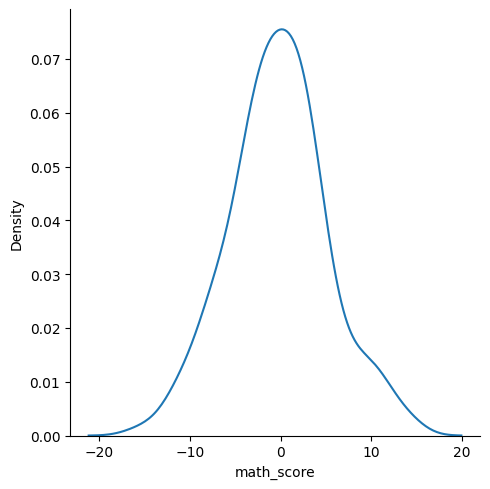

In [73]:
y_resudial=y_test-y_pred

sns.displot(y_resudial,kind='kde')

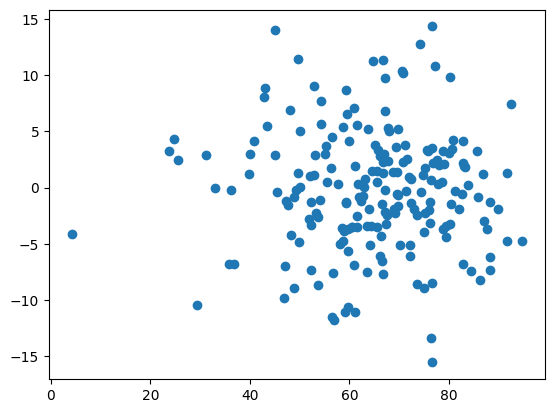

In [74]:
plt.scatter(y_pred,y_resudial)